# Syn data performance
> coPTR vs aPTR on synthetic dataset

In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First things first
Are there even any overlaps?

## Loading and preprocessing data

In [3]:
coptr_ptrs = pd.read_csv(
    '../experiments/synthetic/coptr_out/coptr_log2_ptrs.csv', 
    dtype={0: str}
)
coptr_ptrs = coptr_ptrs.set_index('log2(PTR):genome_id/sample_id')
coptr_ptrs = 2**coptr_ptrs

In [4]:
coptr_ptrs

,SRR2081071,SRR2081072,SRR2081073,SRR2081074,SRR2081075,SRR2081082,SRR2081092,SRR2082404,SRR2082405,SRR2082406,...,SRR2082422,SRR2082423,SRR2082425,SRR2082426,SRR2082429,SRR2082443,SRR2082445,SRR2082446,SRR2082447,SRR2082449
log2(PTR):genome_id/sample_id,,,,,,,,,,,,,,,,,,,,,
1384484.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114320,NaN
209261.6,1.152145,1.089253,1.162372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026363,1.000007,1.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264199.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267747.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.087795,NaN,NaN,1.028200,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.250035,1.269629,1.245936,1.266868,1.358720,NaN
295319.15,1.000007,1.015478,1.000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046612,1.106495,1.231776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326425.4,1.945028,1.988953,1.964543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.856641,NaN,NaN,NaN,NaN,NaN,NaN
367928.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982724,2.109885,NaN
390333.7,1.499257,1.507926,1.473531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# aptr_path = '../experiments/synthetic/aptr_out_100_nofilter/inferred_ptrs.tsv'
aptr_path = '../experiments/synthetic/aptr_out_99_nofilter/inferred_ptrs.tsv'
aptr_ptrs = pd.read_csv(aptr_path, sep='\t', dtype={0: str})
aptr_ptrs = aptr_ptrs.set_index('Unnamed: 0')
aptr_ptrs

,SRR2079821,SRR2080619,SRR2080621,SRR2080623,SRR2080624,SRR2080625,SRR2080626,SRR2080627,SRR2080628,SRR2080629,...,SRR2081059,SRR2081060,SRR2081061,SRR2081062,SRR2081064,SRR2081065,SRR2081066,SRR2081067,SRR2081068,SRR2081069
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
390333.7,4.805342e-04,4.737949e-04,7.235103e-04,4.561554e+00,4.966218e-03,3.247470e+00,2.332423e-02,2.153976e-03,4.128017e-03,3.116941e+00,...,3.681958e+00,3.172624e+00,3.147905e+00,2.923513e+00,5.796643e+00,5.782745e+00,5.767940e+00,5.568831e+00,5.600999e+00,5.528299e+00
1492.48,1.602056e+00,1.617685e+00,1.502319e+00,2.178795e+00,1.730669e+02,2.568874e+18,1.875346e+00,3.214466e+02,1.892551e+00,1.917281e+00,...,1.658519e+00,1.497710e+00,1.504342e+00,1.426141e+00,2.114449e+00,2.108739e+00,2.101726e+00,2.057130e+00,2.063653e+00,2.046617e+00
1069534.5,2.906894e+00,2.908004e+00,2.511827e+00,5.218345e+00,3.362462e+00,2.591946e+00,3.828096e+00,3.145083e+00,3.915281e+00,3.884047e+00,...,2.864773e+00,2.394794e+00,2.376978e+00,2.257554e+00,5.008736e+00,4.967322e+00,4.946785e+00,4.755964e+00,4.791366e+00,4.712752e+00
479436.6,2.296317e+00,2.236096e+00,2.000108e+00,3.617193e+00,1.858815e+00,4.759428e-11,2.699407e+00,1.482838e-03,2.817451e+00,2.668615e+00,...,2.237515e+00,1.968953e+00,1.970473e+00,1.894282e+00,1.892011e+00,6.286278e-01,1.363641e+00,3.143095e+00,2.851625e+00,2.374721e+00
435590.9,9.092708e-01,8.637546e-01,8.963347e-01,2.151181e-01,2.779874e+06,2.846794e+00,4.017638e+00,7.505715e-01,4.126400e+00,4.301052e+00,...,2.925957e+00,2.356834e+00,3.507983e+00,1.292616e+00,1.505214e+14,1.349322e+14,1.327648e+14,2.295256e+14,2.792281e+14,2.235579e+14
701521.8,2.193181e+00,2.193724e+00,1.996237e+00,3.169814e+00,2.356786e+00,2.037680e+00,2.539899e+00,2.423364e+00,2.579524e+00,2.494488e+00,...,2.119659e+00,1.931266e+00,1.929993e+00,1.877906e+00,2.903579e+00,2.880426e+00,2.879027e+00,2.807713e+00,2.824213e+00,2.793108e+00
637910.3,7.528593e+00,2.703609e+00,1.845126e+01,3.291507e+00,1.057892e+02,2.132786e+00,8.878148e+04,3.173362e+01,1.048729e+05,2.797101e+00,...,1.082087e+03,1.185769e+04,8.316670e+03,6.767294e+03,3.110604e+00,3.095669e+00,3.085918e+00,2.991960e+00,3.005577e+00,2.972860e+00
215689.3,1.407447e+00,1.414747e+00,1.281663e+00,1.856498e+00,1.368768e+00,1.447185e+00,1.519880e+00,6.522273e-01,1.545685e+00,1.611193e+00,...,1.197549e+00,2.567320e-01,9.858745e-02,1.185331e+00,1.752517e+00,1.744399e+00,1.742860e+00,1.717746e+00,1.724191e+00,1.711410e+00
515620.4,2.306434e+00,2.318755e+00,2.048413e+00,3.523914e+00,2.472444e+00,2.140201e+00,2.771392e+00,2.584566e+00,2.813041e+00,2.596955e+00,...,2.236757e+00,1.973171e+00,1.979094e+00,1.894826e+00,2.464195e+01,9.097585e+00,1.380545e+01,6.528059e+01,4.071108e+01,6.473119e+01


In [6]:
# OK, so we need to figure out how to map the sample IDs together.

sample_ids = pd.read_csv("../experiments/synthetic/synthetic_ids.txt")
sample_dict = {}

for i, row in sample_ids.iterrows():
    acc = row['Run']
    sample_id = row['Label'].split(".")[0]
    sample_dict[acc] = sample_id

shared_cols = list(set([sample_dict[x] for x in coptr_ptrs.columns]) & set([sample_dict[x] for x in aptr_ptrs.columns]))
print(shared_cols)

['MIX7A', 'DON3A', 'CD4TisA', 'CD11TisB', 'DON2A', 'DON3B', 'CD11Bx', 'MIX8A', 'CD11TisA', 'IBDA', 'MIX2', 'IL10-HF', 'MIX9A', 'IL10-LF', 'MIX7B', 'DON1B', 'MIX8B', 'MIX3', 'CD4TisB', 'IBDB', 'DON1A', 'MIX1', 'CDIFFA', 'CD4Bx', 'IL10-C', 'CDIFFB', 'KEFIR', 'DON2B', 'DON2C', 'DON3C']


In [7]:
shared_genomes = list(set(coptr_ptrs.index) & set(aptr_ptrs.index))
print(shared_genomes)

['390333.7', '557436.4', '367928.6', '28116.7', '435590.9']


In [8]:
# So we need to rename the columns in both DFs to get agreement

aptr_ptrs.columns = [sample_dict[x] for x in aptr_ptrs.columns]
aptr_ptrs = aptr_ptrs[shared_cols]
aptr_ptrs = aptr_ptrs.reindex(shared_genomes)

coptr_ptrs.columns = [sample_dict[x] for x in coptr_ptrs.columns]
coptr_ptrs = coptr_ptrs[shared_cols]
coptr_ptrs = coptr_ptrs.reindex(shared_genomes)


## Checking agreement

In [9]:
good_aptr = ~np.isnan(aptr_ptrs)
good_coptr = ~np.isnan(coptr_ptrs)
good_both = good_aptr & good_coptr

# How many genomes have both good PTRs?
good_both.sum().sum()

27

In [10]:
coptr_ptrs.reindex(aptr_ptrs.index)[good_both]\
    .dropna(how='all', axis=0).dropna(how='all', axis=1)

,DON3A,DON2A,DON3B,MIX2,IL10-HF,MIX9A,DON1B,MIX3,DON1A,MIX1,CDIFFA,IL10-C,CDIFFB,DON2B,DON2C
Unnamed: 0,,,,,,,,,,,,,,,
390333.7,NaN,NaN,NaN,1.507926,NaN,NaN,NaN,1.473531,NaN,1.499257,NaN,NaN,NaN,NaN,NaN
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.174187,NaN,NaN,NaN
367928.6,1.982724,NaN,2.109885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.314728,NaN,1.206596,NaN,NaN
28116.7,1.266868,1.250035,1.358720,NaN,NaN,NaN,1.414126,NaN,1.565895,NaN,NaN,NaN,NaN,1.269629,1.245936
435590.9,1.350090,1.324256,1.409011,1.721191,1.860647,1.330158,1.256932,1.720332,1.211923,1.706967,NaN,NaN,NaN,1.348897,1.379462


In [11]:
aptr_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,DON3A,DON2A,DON3B,MIX2,IL10-HF,MIX9A,DON1B,MIX3,DON1A,MIX1,CDIFFA,IL10-C,CDIFFB,DON2B,DON2C
Unnamed: 0,,,,,,,,,,,,,,,
390333.7,NaN,NaN,NaN,0.000474,NaN,NaN,NaN,0.000724,NaN,0.000481,NaN,NaN,NaN,NaN,NaN
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33222344.0,NaN,NaN,NaN
367928.6,3.443573e+04,NaN,3.889350e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2876834.0,NaN,2986517.0,NaN,NaN
28116.7,9.956502e-02,5.306392e-01,9.377871e-02,NaN,NaN,NaN,3.776235e+05,NaN,1.573533e+08,NaN,NaN,NaN,NaN,5.716376e-01,5.336475e-01
435590.9,2.295256e+14,1.505214e+14,2.792281e+14,0.863755,8.473666e+12,1.292616,2.338884e+14,0.896335,6.221218e+13,0.909271,NaN,NaN,NaN,1.349322e+14,1.327648e+14


In [12]:
aptr_ptrs[(aptr_ptrs < 3) & (aptr_ptrs >= 1) & good_both]

,MIX7A,DON3A,CD4TisA,CD11TisB,DON2A,DON3B,CD11Bx,MIX8A,CD11TisA,IBDA,...,DON1A,MIX1,CDIFFA,CD4Bx,IL10-C,CDIFFB,KEFIR,DON2B,DON2C,DON3C
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
390333.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367928.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435590.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
n_reads = pd.read_csv("../experiments/synthetic/aptr_out_99_nofilter/n_reads_used.tsv", sep='\t', dtype={0: str})
n_reads = n_reads.set_index('Unnamed: 0')
n_reads.columns = [sample_dict[x] for x in n_reads.columns]
n_reads[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX1,MIX2,MIX3,IL10-C,IL10-HF,CDIFFA,CDIFFB,DON1A,DON1B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B
Unnamed: 0,,,,,,,,,,,,,,,
390333.7,2396.939717,2753.976774,948.449815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435590.9,564.899272,621.934347,297.873517,NaN,17.63945,NaN,NaN,8.023749,6.278242,423.089833,11.523102,6.174554,23.013836,7.428055,8.461485
367928.6,NaN,NaN,NaN,NaN,NaN,1869.851074,1325.234417,NaN,NaN,NaN,NaN,NaN,NaN,612.439734,711.881229
557436.4,NaN,NaN,NaN,17.471119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.678694,240.038212,NaN,1535.502698,809.380611,3034.549741,1110.170312,1300.507036


Text(0.5, 1.0, 'Error in PTR vs. number of reads used')

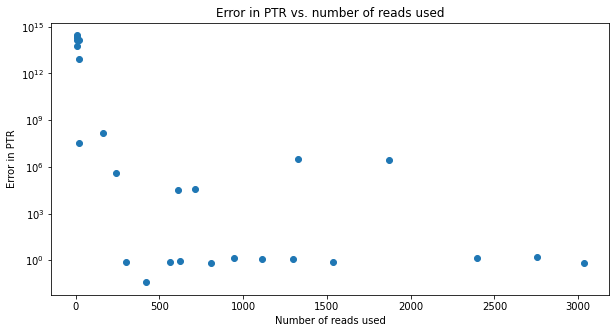

In [14]:
errs = aptr_ptrs[good_both] - coptr_ptrs[good_both]
cols = set(coptr_ptrs.columns) & set(aptr_ptrs.columns)
errs = errs[cols]

fig = plt.figure(figsize=(10, 5))
plt.scatter(
    n_reads[good_both].reindex(errs.index)[cols].values.flatten(),
    np.abs(errs).values.flatten()
)
plt.yscale("log")
# plt.ylim(np.abs(errs).values.min(), 1e17)
plt.xlabel("Number of reads used")
plt.ylabel("Error in PTR")
plt.title("Error in PTR vs. number of reads used")

# Manual exploration

Computing PTRs by hand for specific promising clades. Here we notice that the
genome `435590.9` (Bacteroides vulgatus) has promising amounts of coverage:

In [15]:
# Load intermediate database to ensure MD5s match OTU table

import pickle

db = pickle.load(open("../experiments/synthetic/aptr_out_100/db.pkl", "rb"))
db.db

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
60,575540.3,2,NC_014962,fig|575540.3.rna.55,5377423,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
61,575540.3,2,NC_014962,fig|575540.3.rna.46,4713338,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
62,575540.3,2,NC_014962,fig|575540.3.rna.38,4041636,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,e997d7a3c0c347d96d50214d6ed2f787
95,546269.5,1,CP002390,fig|546269.5.rna.10,719673,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
96,546269.5,1,CP002390,fig|546269.5.rna.33,764888,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
...,...,...,...,...,...,...,...,...,...
7926,471881.3,11,NZ_GG661996,fig|471881.3.rna.29,198505,124357,3749229,tgccagcagccgcggtaatacggagggtgcaagcgttaatcggaat...,cb3a2710c3e4da0ab88cde482a04435a
7957,644284.3,1,NC_014218,fig|644284.3.rna.48,1610087,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,1ad5fe0a24204313cd97864252f30d90
7958,644284.3,1,NC_014218,fig|644284.3.rna.11,493763,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a
7959,644284.3,1,NC_014218,fig|644284.3.rna.35,1073265,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a


In [16]:
# Add genome IDs to OTU table

otu_table = pd.read_csv("../experiments/synthetic/aptr_out_100/otu_table.tsv", sep='\t', dtype={0: str})
otu_table = otu_table.set_index('#OTU ID')
otu_table.columns = [sample_dict[x] for x in otu_table.columns]
otu_table["genomes"] = [db.find_genomes_by_md5([x]) for x in otu_table.index]
otu_table = otu_table[["genomes", *otu_table.columns[:-1]]]
otu_table = otu_table.sort_values(by="genomes", ascending=False)
otu_table

,genomes,MIX1,MIX2,MIX3,CD4Bx,CD4TisA,CD11Bx,CD11TisA,CD4TisB,CD11TisB,...,MIX7B,MIX8A,MIX8B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B,DON3C
#OTU ID,,,,,,,,,,,,,,,,,,,,,
9dd1c3b75daf034bc431cb886600a4f6,[762550.4],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4cc7fa868f6553cd7b0ff99a67f87641,[714313.3],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3cd7622d7072c198b7d19c6996254301,[701521.8],0,0,0,0,0,0,0,0,0,...,5,0,3,2,0,0,0,0,0,0
1b58e2aa85779bd1db01cd0fed155601,[701521.8],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80f8b4dba9e498d49c3254cd20ebe0f0,[66692.6],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4d891631a5931de4c4de1ac7fa0cfdf0,[640131.3],0,0,0,0,0,0,0,0,0,...,13,14,19,10,0,0,0,0,0,0
fefd61bb00126e4bf352ad4b319a3902,[637910.3],0,0,0,0,0,0,0,0,0,...,1188,3089,2222,2045,0,0,0,0,0,0
27b337b1f5c98c155a3a62984aca8a3f,[637910.3],0,0,0,0,0,0,15,0,39,...,8837,22952,15702,14429,0,0,0,0,0,0
8c3a8045575161030c76b6c5e8b1e5a3,"[592022.4, 1348623.7, 545693.3]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


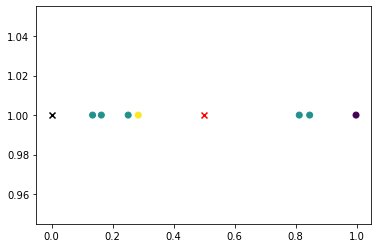

In [30]:
# Plot the sequences and locations for genome 435590.9:

obj, md5s, gen2seq = db.generate_genome_objects("435590.9")

# 16S positions marked with a dot, colored by MD5
plt.scatter(
    x=obj[0]['pos'].flatten(), 
    y=np.ones(len(obj[0]['pos'])),
    c=obj[0]['seqs']
)

# OOR marked with an X
plt.scatter(
    x=db["435590.9"]['oor_position'].iloc[0] / db["435590.9"]['size'].iloc[0],
    y=1,
    marker='x',
    c='black'
)

# Trough marked with an X
plt.scatter(
    x=(db["435590.9"]['oor_position'].iloc[0] + 
    (db["435590.9"]['size'].iloc[0] / 2)) / db["435590.9"]['size'].iloc[0],
    y=1,
    marker='x',
    c='red'
)

# 8417c6a78dc4334150c2f4df256820ee (yellow) is near OOR
# c89d1de8519a383c4ded7c4c4d749b5a (purple) is near trough

In [21]:
# Since the yellow sequence (8417...) 

otus_reduced / otus_reduced.loc["c89d1de8519a383c4ded7c4c4d749b5a"] 
# This is a problem... we should not see 8417... lower than 1

,MIX1,MIX2,MIX3,CD4Bx,MIX7A,MIX7B,MIX8A,MIX8B,MIX9A
#OTU ID,,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000,1.000000
8417c6a78dc4334150c2f4df256820ee,0.763131,0.770626,0.805970,0.001265,0.709677,1.000000,1.05814,1.175,1.089221
94f128434aaffec0dc3a129f2afad905,5.026430,4.775734,4.919089,2.709587,3.516129,6.529412,5.27907,7.650,5.809696


In [19]:
# By manual inspection we found some samples that have reasonably high read
# counts for this genome. Here we try to force the torch solver to solve it:

from src.torch_solver import TorchSolver

good_md5s = [
    "c89d1de8519a383c4ded7c4c4d749b5a",
    "8417c6a78dc4334150c2f4df256820ee",
    "94f128434aaffec0dc3a129f2afad905",
]
good_samples = [
    "MIX1",
    "MIX2",
    "MIX3",
    "CD4Bx",
    "MIX7A",
    "MIX7B",
    "MIX8A",
    "MIX8B",
    "MIX9A",
]


otus_reduced = otu_table.loc[good_md5s, good_samples]

solver = TorchSolver(db=db, otus=otus_reduced)


Using OTU index for md5s


In [22]:
solver.train(clip=True, verbose=False)
solver.B_hat.exp().detach().numpy()

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [23]:
coptr_ptrs.loc["435590.9", good_samples].values

array([1.70696697, 1.72119144, 1.72033188,        nan,        nan,
              nan,        nan,        nan, 1.33015825])

# Try poisson

In [54]:
import torch

solver_poisson = TorchSolver(
    db=db,
    otus=otus_reduced,
    normalize=False
)
solver_poisson.train(loss_fn=torch.nn.PoissonNLLLoss(log_input=False), clip=True, normalize=False, lr=1e-4, epochs=10)

Using OTU index for md5s
Initial:	 -6096.2822265625
Epoch 0:	 -6599.98779296875
Epoch 1:	 -7069.73046875
Epoch 2:	 -7515.345703125
Epoch 3:	 -7943.05908203125
Epoch 4:	 -8356.7490234375
Epoch 5:	 -8758.9541015625
Epoch 6:	 -9151.4697265625
Epoch 7:	 -9535.708984375
Epoch 8:	 -9912.7548828125
Epoch 9:	 -10262.15234375


(array([[1.9435242, 1.9435439, 1.9433964, 1.943546 , 1.9291854, 1.9272081,
         1.9402833, 1.938206 , 1.9434942]], dtype=float32),
 array([[0.        , 0.        , 0.        , 0.        , 0.00357762,
         0.00424841, 0.        , 0.        , 0.        ]], dtype=float32),
 [-6096.2822265625,
  -6096.8095703125,
  -6097.3349609375,
  -6097.86181640625,
  -6098.3876953125,
  -6098.91259765625,
  -6099.43994140625,
  -6099.96533203125,
  -6100.49267578125,
  -6101.017578125,
  -6101.5439453125,
  -6102.0693359375,
  -6102.59619140625,
  -6103.12158203125,
  -6103.64697265625,
  -6104.17236328125,
  -6104.69921875,
  -6105.224609375,
  -6105.74951171875,
  -6106.27685546875,
  -6106.80029296875,
  -6107.3271484375,
  -6107.8525390625,
  -6108.37744140625,
  -6108.90283203125,
  -6109.42822265625,
  -6109.95263671875,
  -6110.4775390625,
  -6111.0029296875,
  -6111.52734375,
  -6112.05224609375,
  -6112.5771484375,
  -6113.10205078125,
  -6113.626953125,
  -6114.15087890625,
  -6114.6

In [36]:
coptr_ptrs.loc["435590.9", good_samples].values

array([1.70696697, 1.72119144, 1.72033188,        nan,        nan,
              nan,        nan,        nan, 1.33015825])

In [37]:
solver_poisson.B_hat.exp().detach().numpy()

array([[1.       , 1.       , 1.       , 1.       , 1.0745717, 1.1090169,
        1.0035849, 1.0146644, 1.       ]], dtype=float32)

In [ ]:
solver_poisson.A_hat.exp().detach().numpy()

array([[0.82312244, 0.82698387, 0.81411046, 0.8272199 , 0.8078565 ,
        0.80785567, 0.80820453, 0.80804944, 0.8192876 ]], dtype=float32)

In [46]:
A = solver_poisson.A_hat
B = solver_poisson.B_hat
C = solver_poisson.members
D = solver_poisson.dists
E = solver_poisson.gene_to_seq

print(A.shape, B.shape, C.shape, D.shape, E.shape)

print(solver(A,B))
print(E @ torch.exp(C @ A + 1 - D @ B))

torch.Size([1, 9]) torch.Size([1, 9]) torch.Size([7, 1]) torch.Size([7, 1]) torch.Size([3, 7])
tensor([[ 20.0775,  20.0810,  20.0650,  20.0814,  17.0473,  16.2035,  19.7123,
          19.2811,  20.0739],
        [100.3876, 100.4048, 100.3251, 100.4071,  88.7420,  85.8680,  98.7581,
          97.1909, 100.3695],
        [ 20.0775,  20.0810,  20.0650,  20.0814,  17.9454,  17.4456,  19.7627,
          19.4825,  20.0739]], grad_fn=<MmBackward0>)
tensor([[ 20.0775,  20.0810,  20.0650,  20.0814,  17.0473,  16.2035,  19.7123,
          19.2811,  20.0739],
        [100.3876, 100.4048, 100.3251, 100.4071,  88.7420,  85.8680,  98.7581,
          97.1909, 100.3695],
        [ 20.0775,  20.0810,  20.0650,  20.0814,  17.9454,  17.4456,  19.7627,
          19.4825,  20.0739]], grad_fn=<MmBackward0>)


In [57]:
g1 = torch.exp(C @ A + 1 - D @ B)
g2 = torch.exp(C @ A) * torch.exp(1 - D @ B)
g3 = C @ torch.exp(A) * torch.exp(1 - D @ B)
g4 = C @ torch.exp(A) * torch.e / torch.exp(D @ B)

assert torch.allclose(g1, g2)
assert torch.allclose(g2, g3)
assert torch.allclose(g3, g4)

AssertionError: 

In [ ]:
solver_poisson(solver_poisson.A_hat, solver_poisson.B_hat).detach().numpy()

array([[ 1.8499821,  1.867999 ,  1.8088108,  1.8734436,  1.7806549,
         1.7806405,  1.7821981,  1.7814943,  1.8319621],
       [10.304253 , 10.374565 , 10.1420765, 10.38907  , 10.030401 ,
        10.03036  , 10.036562 , 10.033777 , 10.234086 ],
       [ 2.1196098,  2.1325922,  2.0895553,  2.1347952,  2.0688019,
         2.0687957,  2.0699499,  2.069433 ,  2.106664 ]], dtype=float32)

In [ ]:
solver.coverages.sum()

tensor(9.)

In [ ]:
solver_poisson.coverages

tensor([[2.9891e+03, 3.9151e+03, 1.2731e+03, 7.1141e+03, 3.1100e+01, 1.7100e+01,
         8.6100e+01, 4.0100e+01, 1.9391e+03],
        [1.5024e+04, 1.8697e+04, 6.2621e+03, 1.9276e+04, 1.0910e+02, 1.1110e+02,
         4.5410e+02, 3.0610e+02, 1.1265e+04],
        [2.2811e+03, 3.0171e+03, 1.0261e+03, 9.1000e+00, 2.2100e+01, 1.7100e+01,
         9.1100e+01, 4.7100e+01, 2.1121e+03]])

In [ ]:
otus_reduced

,MIX1,MIX2,MIX3,CD4Bx,MIX7A,MIX7B,MIX8A,MIX8B,MIX9A
#OTU ID,,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,2989,3915,1273,7114,31,17,86,40,1939
8417c6a78dc4334150c2f4df256820ee,2281,3017,1026,9,22,17,91,47,2112
94f128434aaffec0dc3a129f2afad905,15024,18697,6262,19276,109,111,454,306,11265


In [ ]:
solver_poisson2 = TorchSolver(
    db=db,
    otus=otu_table.iloc[:,1:],
    normalize=False
)
solver_poisson2.train(loss_fn=torch.nn.PoissonNLLLoss(log_input=False), clip=True, normalize=False, lr=1e-4, epochs=50)

Using OTU index for md5s
Initial:	 -2339.902587890625
Epoch 0:	 -2454.367919921875
Epoch 1:	 -2569.36865234375
Epoch 2:	 -2684.765625
Epoch 3:	 -2800.541015625
Epoch 4:	 -2916.67138671875
Epoch 5:	 -3033.151611328125
Epoch 6:	 -3149.9775390625
Epoch 7:	 -3267.12255859375
Epoch 8:	 -3384.588623046875
Epoch 9:	 -3498.242431640625
Epoch 10:	 -3580.29443359375
Epoch 11:	 -3662.181396484375
Epoch 12:	 -3743.919677734375
Epoch 13:	 -3825.50244140625
Epoch 14:	 -3906.9169921875
Epoch 15:	 -3988.1533203125
Epoch 16:	 -4069.1943359375
Epoch 17:	 -4150.02783203125
Epoch 18:	 -4230.6396484375
Epoch 19:	 -4311.00244140625
Epoch 20:	 -4391.0908203125
Epoch 21:	 -4470.888671875
Epoch 22:	 -4550.3740234375
Epoch 23:	 -4629.52490234375
Epoch 24:	 -4708.3203125
Epoch 25:	 -4786.693359375
Epoch 26:	 -4864.6455078125
Epoch 27:	 -4942.14111328125
Epoch 28:	 -5019.1396484375
Epoch 29:	 -5095.6025390625
Epoch 30:	 -5171.419921875
Epoch 31:	 -5246.59716796875
Epoch 32:	 -5321.08740234375
Epoch 33:	 -5394.850

(array([[-0.5945349 ,  0.79175955, -0.3068528 , -2.3862941 , -2.3862941 ,
          5.970335  , -0.99999994, -0.4403842 , -2.3862941 ,  0.38629442,
          0.25276294, -0.7768564 ,  2.0565896 ,  4.7536693 ,  2.2833643 ,
          3.0532053 ,  2.1267967 ,  2.4186988 , -3.5451818 , -3.5451818 ,
         -3.5451818 , -3.5451818 , -3.5451818 , -3.5451818 , -3.5451818 ,
          1.0794408 , -0.0837094 ,  1.7717735 , -1.0800666 , -0.4403841 ,
         -1.2575967 ],
        [ 5.9600964 ,  5.9697304 ,  5.867735  ,  5.970739  ,  1.3883551 ,
         -1.1171699 , -0.748687  , -1.0000026 , -1.3364744 ,  1.0053328 ,
          5.9482217 ,  0.0498226 ,  5.988065  ,  5.9888067 , -0.7117052 ,
          0.67459154,  5.9458995 ,  5.957815  , -2.5034635 , -0.30006722,
          2.1416867 ,  2.1582046 ,  3.5449    ,  3.272319  ,  5.9433913 ,
          5.5450654 ,  5.0802884 ,  5.8149214 ,  5.408108  ,  5.4886813 ,
          4.7139783 ],
        [-3.5451822 , -3.5451822 , -3.5451822 , -3.5451822 , -3.54

In [ ]:
ptr_est = solver_poisson2.B_hat.exp().detach().numpy()
ptr_est * ((ptr_est != 1) & (ptr_est != np.e))

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 1.2389469, 1.5870931, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 2.124573 , 0.       , 1.3019049, 1.0922748, 1.685435 ,
        0.       , 1.9408476, 0.       , 1.0001447, 2.4934433, 2.1621566,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       

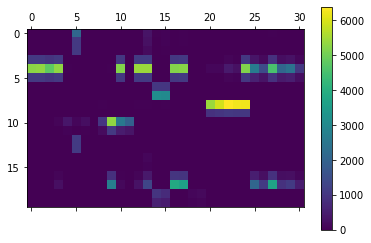

In [ ]:
plt.matshow(solver_poisson2(solver_poisson2.A_hat, solver_poisson2.B_hat).detach().numpy().astype(int))
plt.colorbar()

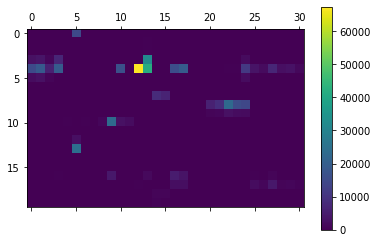

In [ ]:
plt.matshow(solver_poisson2.coverages.numpy().astype(int))
plt.colorbar()

In [ ]:
solver.B_hat.exp().detach().numpy()[good_both.values]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 5

In [ ]:
solver_poisson2_ptrs = pd.DataFrame(
    solver_poisson2.B_hat.exp().detach().numpy(),
    index=solver_poisson2.genome_ids,
    columns=solver_poisson2.sample_ids
)

In [ ]:
torch.nn.PoissonNLLLoss(log_input=False)(torch.tensor([0]), torch.tensor([4]))

tensor(73.6827)

In [ ]:
good_both.values.shape

(5, 30)

In [ ]:
solver_poisson2.B_hat.shape

torch.Size([9, 31])